In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset
us = pd.read_csv('US ND prediction/us_disaster_declarations.csv')

In [3]:
us.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_begin_date,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
0,DR-1-GA,1,GA,DR,1953-05-02T04:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T04:00:00Z,1953-05-02T04:00:00Z,NaN,13000,0,Statewide,53013,2f28952448e0a666d367ca3f854c81ec,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602bf
1,DR-2-TX,2,TX,DR,1953-05-15T04:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T04:00:00Z,1953-05-15T04:00:00Z,NaN,48000,0,Statewide,53003,c5a1a4a1030d6730d9c562cdbe7c830f,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c3
2,DR-3-LA,3,LA,DR,1953-05-29T04:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T04:00:00Z,1953-05-29T04:00:00Z,NaN,22000,0,Statewide,53005,745948932fd77a7c6dcd4de7059ff080,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c1
3,DR-4-MI,4,MI,DR,1953-06-02T04:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T04:00:00Z,1953-06-02T04:00:00Z,NaN,26000,0,Statewide,53004,8c9dee13124e36a9dfe2eb74e33fafad,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c0
4,DR-5-MT,5,MT,DR,1953-06-06T04:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T04:00:00Z,1953-06-06T04:00:00Z,NaN,30000,0,Statewide,53006,59c5483387ca13c6a3c1bc692f4860e1,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c7


In [4]:
# checking for null values
us.isnull().sum()

fema_declaration_string           0
disaster_number                   0
state                             0
declaration_type                  0
declaration_date                  0
fy_declared                       0
incident_type                     0
declaration_title                 0
ih_program_declared               0
ia_program_declared               0
pa_program_declared               0
hm_program_declared               0
incident_begin_date               0
incident_end_date              8085
disaster_closeout_date        56586
fips                              0
place_code                        0
designated_area                   0
declaration_request_number        0
hash                             75
last_refresh                      0
id                                0
dtype: int64

In [5]:
# shape of dataset
us.shape

(59084, 22)

In [6]:
# Getting the dates coloumn
li = us['declaration_date'].tolist()

In [7]:
# Seperate the day, month, and year into seperate lists.
def date_seperation(dates):
    year = []
    month = []
    day = []
    for l in li:
        l = str(l)
        str_date = l.split('-')
        str_date = list(str_date)
        day.append(int("".join(str_date[2][:2]))) 
        year.append(int("".join(str_date[0])))
        month.append(int("".join(str_date[1])))
    return(year, month, day)

year, month, day =  date_seperation(li)  

In [8]:
#Create new coloumns
us['year'] = year
us['month'] = month
us['day'] = day

In [9]:
us.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id,year,month,day
0,DR-1-GA,1,GA,DR,1953-05-02T04:00:00Z,1953,Tornado,Tornado,0,1,...,13000,0,Statewide,53013,2f28952448e0a666d367ca3f854c81ec,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602bf,1953,5,2
1,DR-2-TX,2,TX,DR,1953-05-15T04:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,48000,0,Statewide,53003,c5a1a4a1030d6730d9c562cdbe7c830f,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c3,1953,5,15
2,DR-3-LA,3,LA,DR,1953-05-29T04:00:00Z,1953,Flood,Flood,0,1,...,22000,0,Statewide,53005,745948932fd77a7c6dcd4de7059ff080,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c1,1953,5,29
3,DR-4-MI,4,MI,DR,1953-06-02T04:00:00Z,1953,Tornado,Tornado,0,1,...,26000,0,Statewide,53004,8c9dee13124e36a9dfe2eb74e33fafad,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c0,1953,6,2
4,DR-5-MT,5,MT,DR,1953-06-06T04:00:00Z,1953,Flood,Floods,0,1,...,30000,0,Statewide,53006,59c5483387ca13c6a3c1bc692f4860e1,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c7,1953,6,6


In [10]:
# collecting the needed coloumns.
us  = us[['year','month','day','state','designated_area','declaration_title']]

In [13]:
us.shape

(59084, 6)

In [12]:
us.duplicated().any()

True

In [14]:
us.drop_duplicates(inplace=True)

In [15]:
us.shape

(59031, 6)

In [16]:
us.duplicated().any()

False

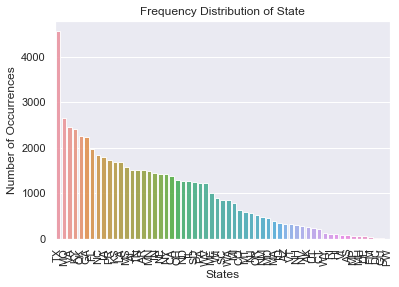

In [17]:
# visual display of the most affected states
state_count = us['state'].value_counts()
sns.set(style="darkgrid")
sns.barplot(state_count.index, state_count.values, alpha=0.9)
plt.title('Frequency Distribution of State')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.xticks(rotation = 90)
plt.show()  # So from what we can see there is alot occurance of disasters in the state of texas


In [18]:
state = dict(enumerate(us.state.astype('category').cat.categories))
designated_area = dict(enumerate(us.designated_area.astype('category').cat.categories))
declaration_title = dict(enumerate(us.declaration_title.astype('category').cat.categories))

In [19]:
us['state_code'] = us.state.astype('category').cat.codes
us['designated_area_code'] = us.designated_area.astype('category').cat.codes
us['declaration_title_code'] = us.declaration_title.astype('category').cat.codes

In [20]:
us.head()

,year,month,day,state,designated_area,declaration_title,state_code,designated_area_code,declaration_title_code
0,1953,5,2,GA,Statewide,Tornado,12,2135,1737
1,1953,5,15,TX,Statewide,Tornado & Heavy Rainfall,50,2135,1738
2,1953,5,29,LA,Statewide,Flood,21,2135,492
3,1953,6,2,MI,Statewide,Tornado,26,2135,1737
4,1953,6,6,MT,Statewide,Floods,31,2135,520


In [21]:
us.drop(['state','designated_area','declaration_title'],inplace = True, axis=1)

In [22]:
us.head()

,year,month,day,state_code,designated_area_code,declaration_title_code
0,1953,5,2,12,2135,1737
1,1953,5,15,50,2135,1738
2,1953,5,29,21,2135,492
3,1953,6,2,26,2135,1737
4,1953,6,6,31,2135,520


In [23]:
def date_ordering(us):
    combo =[]
    year = us['year'].tolist()
    month = us['month'].tolist()
    day =us['day'].tolist()
    zipped = zip(day, month, year)
    for i,j, k in zipped:
        combo.append(str(i)+'/'+str(j)+'/'+ str(k))
        
    return combo

In [24]:
fulldate = date_ordering(us)

In [25]:
us['fulldate'] = fulldate

In [26]:
us.set_index("fulldate", inplace = True) 

In [27]:
us.head()

,year,month,day,state_code,designated_area_code,declaration_title_code
fulldate,,,,,,
2/5/1953,1953,5,2,12,2135,1737
15/5/1953,1953,5,15,50,2135,1738
29/5/1953,1953,5,29,21,2135,492
2/6/1953,1953,6,2,26,2135,1737
6/6/1953,1953,6,6,31,2135,520


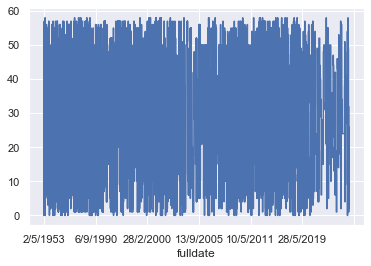

In [28]:
# Trying to see if I can use the countries to visualize a trend.
us['state_code'].plot()

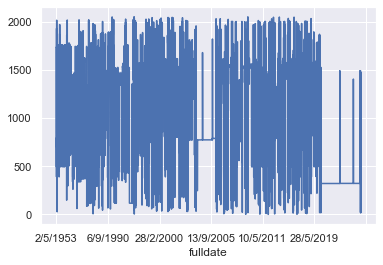

In [29]:
# Trying to see if I can visualize a trend in natural disasters.
us['declaration_title_code'].plot()

In [30]:
us.shape

(59031, 6)

In [31]:
#splitting the dataset into train and test
us_train = us[0:59000]
us_test = us[59000:]

In [32]:
us_train.head()

,year,month,day,state_code,designated_area_code,declaration_title_code
fulldate,,,,,,
2/5/1953,1953,5,2,12,2135,1737
15/5/1953,1953,5,15,50,2135,1738
29/5/1953,1953,5,29,21,2135,492
2/6/1953,1953,6,2,26,2135,1737
6/6/1953,1953,6,6,31,2135,520


In [33]:
us_test.head()

,year,month,day,state_code,designated_area_code,declaration_title_code
fulldate,,,,,,
8/5/2020,2020,5,8,32,2727,1471
8/5/2020,2020,5,8,32,2733,1471
8/5/2020,2020,5,8,2,546,1474
8/5/2020,2020,5,8,10,194,322
8/5/2020,2020,5,8,10,264,322


In [34]:
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler(feature_range = (0,1))
us_scaled_set = sc.fit_transform(us_train)

In [35]:
time_steps = 90
length =  len(us_scaled_set)
col = us.shape[1]

In [36]:
# creating the time steps
x_train = []
y_train = []

for i in range(time_steps, length):
    x_train.append(us_scaled_set[i-time_steps:i, :])  
    y_train.append(us_scaled_set[i,:])

In [37]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [38]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], col))

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import backend
from keras.models import load_model

Using TensorFlow backend.


In [40]:
# 6 layer LSTM 0f 35 neurons each.
detector = Sequential()
detector.add(LSTM(units = 60, return_sequences = True, input_shape = (x_train.shape[1], col)))
detector.add(Dropout(0.3))
detector.add(LSTM(units = 60, return_sequences =True))
detector.add(Dropout(0.3))
detector.add(LSTM(units = 60, return_sequences =True))
detector.add(Dropout(0.3))
detector.add(LSTM(units = 60, return_sequences =True))
detector.add(Dropout(0.3))
detector.add(LSTM(units = 60, return_sequences =True))
detector.add(Dropout(0.3))
detector.add(LSTM(units = 60))
detector.add(Dropout(0.3))
detector.add(Dense(units=col))
detector.compile(optimizer = 'RMSprop', loss = 'mean_squared_error', metrics = ['accuracy'])

In [ ]:
detector.fit(x_train, y_train, epochs = 30, batch_size = 30)

Epoch 1/30
58910/58910 [==============================] - 1787s 30ms/step - loss: 0.0371 - accuracy: 0.5981
Epoch 2/30
58910/58910 [==============================] - 1752s 30ms/step - loss: 0.0245 - accuracy: 0.6736
Epoch 3/30
58910/58910 [==============================] - 1777s 30ms/step - loss: 0.0224 - accuracy: 0.6831
Epoch 4/30
58910/58910 [==============================] - 1599s 27ms/step - loss: 0.0218 - accuracy: 0.6895
Epoch 5/30
58910/58910 [==============================] - 860s 15ms/step - loss: 0.0213 - accuracy: 0.6903
Epoch 6/30
58910/58910 [==============================] - 633s 11ms/step - loss: 0.0211 - accuracy: 0.6952
Epoch 7/30
58910/58910 [==============================] - 632s 11ms/step - loss: 0.0209 - accuracy: 0.6917
Epoch 8/30
58910/58910 [==============================] - 649s 11ms/step - loss: 0.0207 - accuracy: 0.6976
Epoch 9/30
58910/58910 [==============================] - 650s 11ms/step - loss: 0.0205 - accuracy: 0.7019
Epoch 10/30
58910/58910 [========

In [ ]:
detector.save('ND_detector.h5')

### test dataset

In [ ]:
us_test.head()

In [ ]:
real_length = len(us_test)

In [ ]:
total_data = pd.concat((us_train, us_test), axis = 0)

In [ ]:
inputs = total_data[len(us_train) - len(us_test) - time_steps :].values
inputs = inputs.reshape(-1,col)

In [ ]:
inputs = sc.transform(inputs)

In [ ]:
value = time_steps + real_length

In [ ]:
x_test = []
for i in range(time_steps, value):                
    x_test.append(inputs[i - time_steps: i, : ])    
                                              

In [ ]:
x_test= np.array(x_test)
x_test.shape

In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], col))

In [ ]:
detect = load_model('ND_detector.h5')

In [ ]:
predicted_values = detect.predict(x_test)
predicted_values = sc.inverse_transform(predicted_values)

In [ ]:
pred_df = pd.DataFrame(predicted_values, columns= us_test.columns)

In [ ]:
pred_df = pred_df.round()
pred_df.head()

In [ ]:
us_test.head()

In [ ]:
pred_df['state'] = pred_df['state_code'].map(state)
pred_df['designated_area'] = pred_df['designated_area_code'].map(designated_area)
pred_df['declaration_title'] = pred_df['declaration_title_code'].map(declaration_title)

In [ ]:
pred_df.drop(['state_code','designated_area_code','declaration_title_code'],inplace = True, axis=1)

In [ ]:
us_test['state'] = us_test['state_code'].map(state)
us_test['designated_area'] = us_test['designated_area_code'].map(designated_area)
us_test['declaration_title'] = us_test['declaration_title_code'].map(declaration_title)

In [ ]:
us_test.drop(['state_code','designated_area_code','declaration_title_code'],inplace = True, axis=1)

In [ ]:
pred_df.head()

In [ ]:
us_test.head()